Parent Graph Structure:


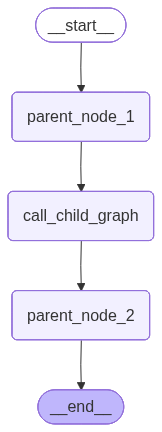


Child Graph Structure:


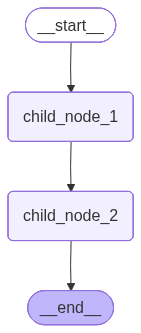


EXECUTING PARENT GRAPH
Initial Input: {'my_key': 'Hello World'}


Parent Node 1 - Input: Hello World
Parent Node 1 - Output: Parent initialized: Hello World

Calling Child Graph - State Transformation
Before transformation (ParentState): my_key = 'Parent initialized: Hello World'
After transformation (ChildState): my_child_key = 'Parent initialized: Hello World'

Child Node 1 - Input: Parent initialized: Hello World
Child Node 1 - Output: Child processed: Parent initialized: Hello World
Child Node 2 - Input: Child processed: Parent initialized: Hello World
Child Node 2 - Output: Child processed: Parent initialized: Hello World [enhanced by child]

Child graph output (ChildState): my_child_key = 'Child processed: Parent initialized: Hello World [enhanced by child]'
After reverse transformation (ParentState): my_key = 'Child processed: Parent initialized: Hello World [enhanced by child]'

Parent Node 2 - Input: Child processed: Parent initialized: Hello World [enhanced by child]
Parent 

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# ========== 定义状态 ==========


class ParentState(TypedDict):
    my_key: str


class ChildState(TypedDict):
    my_child_key: str


# ========== 创建子图 ==========
child_builder = StateGraph(ChildState)


def child_node_1(state: ChildState) -> ChildState:
    """子图的第一个节点：处理输入"""
    original = state["my_child_key"]
    processed = f"Child processed: {original}"
    print(f"Child Node 1 - Input: {original}")
    print(f"Child Node 1 - Output: {processed}")
    return {"my_child_key": processed}


def child_node_2(state: ChildState) -> ChildState:
    """子图的第二个节点：进一步处理"""
    current = state["my_child_key"]
    enhanced = f"{current} [enhanced by child]"
    print(f"Child Node 2 - Input: {current}")
    print(f"Child Node 2 - Output: {enhanced}")
    return {"my_child_key": enhanced}


# 添加子图节点
child_builder.add_node("child_node_1", child_node_1)
child_builder.add_node("child_node_2", child_node_2)

# 定义子图流程
child_builder.add_edge(START, "child_node_1")
child_builder.add_edge("child_node_1", "child_node_2")
child_builder.add_edge("child_node_2", END)

# 编译子图
child_graph = child_builder.compile()

# ========== 创建父图 ==========
builder = StateGraph(ParentState)


def parent_node_1(state: ParentState) -> ParentState:
    """父图的第一个节点：初始处理"""
    original = state["my_key"]
    processed = f"Parent initialized: {original}"
    print(f"\nParent Node 1 - Input: {original}")
    print(f"Parent Node 1 - Output: {processed}")
    return {"my_key": processed}


def call_child_graph(state: ParentState) -> ParentState:
    """调用子图并进行状态转换"""
    print(f"\n{'='*60}")
    print("Calling Child Graph - State Transformation")
    print(f"{'='*60}")

    # 状态转换：父图状态 -> 子图状态 (ParentState.my_key -> ChildState.my_child_key)
    print(f"Before transformation (ParentState): my_key = '{state['my_key']}'")
    child_graph_input = {"my_child_key": state["my_key"]}
    print(
        f"After transformation (ChildState): my_child_key = '{child_graph_input['my_child_key']}'")
    print()

    # 调用子图
    child_graph_output = child_graph.invoke(child_graph_input)

    # 状态转换：子图状态 -> 父图状态 (ChildState.my_child_key -> ParentState.my_key)
    print(
        f"\nChild graph output (ChildState): my_child_key = '{child_graph_output['my_child_key']}'")
    result = {"my_key": child_graph_output["my_child_key"]}
    print(
        f"After reverse transformation (ParentState): my_key = '{result['my_key']}'")
    print(f"{'='*60}\n")

    return result


def parent_node_2(state: ParentState) -> ParentState:
    """父图的最后一个节点：最终处理"""
    current = state["my_key"]
    final = f"{current} [finalized by parent]"
    print(f"Parent Node 2 - Input: {current}")
    print(f"Parent Node 2 - Output: {final}")
    return {"my_key": final}


# 添加父图节点
builder.add_node("parent_node_1", parent_node_1)
builder.add_node("call_child_graph", call_child_graph)
builder.add_node("parent_node_2", parent_node_2)

# 定义父图流程
builder.add_edge(START, "parent_node_1")
builder.add_edge("parent_node_1", "call_child_graph")
builder.add_edge("call_child_graph", "parent_node_2")
builder.add_edge("parent_node_2", END)

# 编译父图
graph = builder.compile()

# ========== 显示图结构 ==========
print("Parent Graph Structure:")
display(Image(graph.get_graph().draw_mermaid_png()))

print("\nChild Graph Structure:")
display(Image(child_graph.get_graph().draw_mermaid_png()))

# ========== 测试图 ==========
print("\n" + "="*60)
print("EXECUTING PARENT GRAPH")
print("="*60)

inputs = {"my_key": "Hello World"}
print(f"Initial Input: {inputs}\n")

final_state = graph.invoke(inputs)

print("\n" + "="*60)
print("FINAL RESULT")
print("="*60)
print(f"Final State: {final_state}")